# Water level in Australia

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## (1) Australian Capital Territory

In [5]:
fnameACT = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Australian Capital Territory\level_ACT.csv'
#fname = 'level_nsw.csv'
dataACT = pd.read_csv(fnameACT)
print(dataACT)

        hydroid  hydrocode bore_id data_owner            bore_date  \
0      80000004        186      F1     w00075  2006-04-27 00:00:00   
1      80000004        186      F1     w00075  2006-04-27 00:00:00   
2      80000004        186      F1     w00075  2006-04-28 00:00:00   
3      80000004        186      F1     w00075  2006-04-28 00:00:00   
4      80000004        186      F1     w00075  2006-04-29 00:00:00   
...         ...        ...     ...        ...                  ...   
78815  80000009        194     WD3     w00075  2015-09-22 14:09:25   
78816  80000009        194     WD3     w00075  2015-09-23 00:00:00   
78817  80000009        194     WD3     w00075  2015-09-23 14:09:25   
78818  80000009        194     WD3     w00075  2015-09-24 00:00:00   
78819  80000009        194     WD3     w00075  2015-09-24 14:09:25   

      obs_point_datum  result quality_flag  
0                 DTW    1.61          NaN  
1             UNKNOWN    1.61    quality-E  
2                 DTW   

In [6]:
hid    = dataACT.iloc[:,0].to_numpy()
uidACT    = np.unique(hid)
hcode  = dataACT.iloc[:,1].to_numpy()
bid    = dataACT.iloc[:,2].to_numpy()
down   = dataACT.iloc[:,3].to_numpy()
date   = dataACT.iloc[:,4].to_numpy()
typed  = dataACT.iloc[:,5].to_numpy()
wlevel = dataACT.iloc[:,6].to_numpy()
qual   = dataACT.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidACT))

# de estaciones  15


### Cantidad de datos por estación

In [7]:
dataACT['bore_date'] = pd.to_datetime(dataACT['bore_date']) #cambiar formato
data = dataACT.dropna(subset=['bore_date']) #eliminar espacios vacios
dpe = dataACT.groupby (["bore_id", dataACT["bore_date"].dt.year]).size()

df_dep= dpe.reset_index()
df_dep.columns = ["Estación", "Año", "Cantidad de datos"]


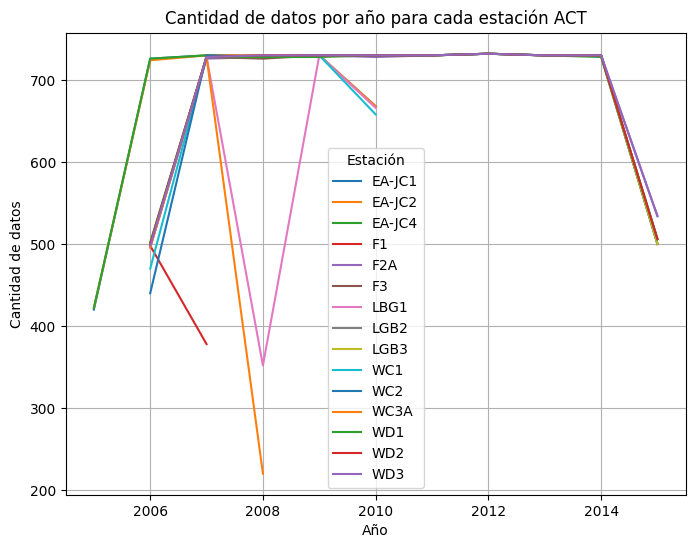

In [8]:
plt.figure(figsize=(8, 6))

# Iterar sobre cada estación
for estacion, datos_estacion in df_dep.groupby('Estación'):
    plt.plot(datos_estacion['Año'], datos_estacion['Cantidad de datos'], label=estacion)

# Configuraciones del gráfico
plt.title('Cantidad de datos por año para cada estación ACT')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.legend(title='Estación')
plt.grid(True)
plt.show()

### Estación con más datos

In [9]:
max_datos = dpe.idxmax()
estacion_max_datos, anio_max_datos = max_datos
print(f'Estación con más datos: {estacion_max_datos}, Año: {anio_max_datos}, Cantidad de datos: {dpe[max_datos]}')

Estación con más datos: EA-JC4, Año: 2012, Cantidad de datos: 732


### Año con más datos

In [10]:
spa = dpe.groupby(level=1).sum()
amd = spa.idxmax()
print("El año con la mayor cantidad de datos es:", amd)

El año con la mayor cantidad de datos es: 2007


### Estación

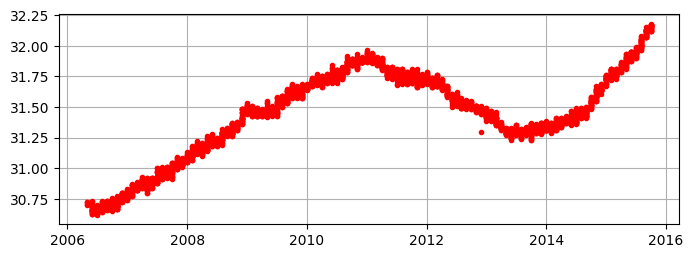

In [11]:
ista = 4
iloc1 = np.where((typed=='SWL') & (hid==uidACT[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidACT[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidACT[ista]))[0]
#for i in range(len(iloc)):
#    print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

### Porcentajes de aporte de cada estación

In [12]:
total_datos = dpe.sum()
ppe = (dpe / total_datos)*100

print(ppe)

bore_id  bore_date
EA-JC1   2005         0.532860
         2006         0.921086
         2007         0.926161
         2008         0.926161
         2009         0.926161
                        ...   
WD3      2011         0.926161
         2012         0.928698
         2013         0.926161
         2014         0.926161
         2015         0.677493
Length: 118, dtype: float64


In [13]:
valor_mayor = ppe.max()
valor_menor = ppe.min()
media = ppe.mean()

# Imprimir los resultados
print("El valor mayor es:", valor_mayor)
print("El valor menor es:", valor_menor)
print("La media es:", media)

El valor mayor es: 0.9286982999238772
El valor menor es: 0.2791169753869576
La media es: 0.8474576271186438


In [14]:
acd = spa.index
print("Años con datos:", acd)

Años con datos: Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='bore_date')


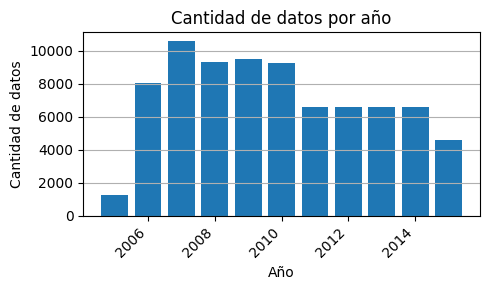

In [15]:
# Graficar el histograma
plt.figure(figsize=(5, 3))
plt.bar(spa.index, spa.values)
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.grid(axis='y')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## (2) New South Wales

In [16]:
fnameNSW = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\New South Wales\level_nsw.csv'
dataNSW = pd.read_csv(fnameNSW)
print(dataNSW)

           hydroid     hydrocode       bore_id data_owner  \
0         10100229  GW088499.2.2  GW088499.2.2     w00077   
1         10100229  GW088499.2.2  GW088499.2.2     w00077   
2         10100229  GW088499.2.2  GW088499.2.2     w00077   
3         10100229  GW088499.2.2  GW088499.2.2     w00077   
4         10100229  GW088499.2.2  GW088499.2.2     w00077   
...            ...           ...           ...        ...   
18717530  10007530  GW081000.1.1  GW081000.1.1     w00077   
18717531  10007530  GW081000.1.1  GW081000.1.1     w00077   
18717532  10007530  GW081000.1.1  GW081000.1.1     w00077   
18717533  10007530  GW081000.1.1  GW081000.1.1     w00077   
18717534  10007530  GW081000.1.1  GW081000.1.1     w00077   

                    bore_date obs_point_datum  result quality_flag  
0         2003-09-01 00:00:00             DTW   23.35    quality-E  
1         2003-09-01 00:00:00     RSWL (mAHD)   31.66    quality-E  
2         2003-09-01 00:00:00             SWL   24.35    qua

In [17]:
hid    = dataNSW.iloc[:,0].to_numpy()
uidNSW    = np.unique(hid)
hcode  = dataNSW.iloc[:,1].to_numpy()
bid    = dataNSW.iloc[:,2].to_numpy()
down   = dataNSW.iloc[:,3].to_numpy()
date   = dataNSW.iloc[:,4].to_numpy()
typed  = dataNSW.iloc[:,5].to_numpy()
wlevel = dataNSW.iloc[:,6].to_numpy()
qual   = dataNSW.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidNSW))

# de estaciones  5722


### Cantidad de datos por estación

In [22]:
dataNSW["bore_date"] = pd.to_datetime(dataNSW["bore_date"], errors='coerce') #corregir datos mal escritos
data = dataNSW.dropna(subset=["bore_date"])
dpeNSW = dataNSW.groupby(["bore_id", dataNSW["bore_date"].dt.year]).size()

df_dep = dpeNSW = dpeNSW.reset_index()
df_dep.columns = ["Estacion", "Anio", "Cantidad"]

### Estación con más datos

In [25]:
max_datosNSW = dpeNSW.idxmax()
np.errstate(invalid="ignore")
estacion_max_datos, anio_max_datos = max_datos
print(f"Estación con más datos: {estacion_max_datos}, Año: {anio_max_datos}, Cantidad de datos: {dpe[max_datos]}")

TypeError: reduction operation 'argmax' not allowed for this dtype

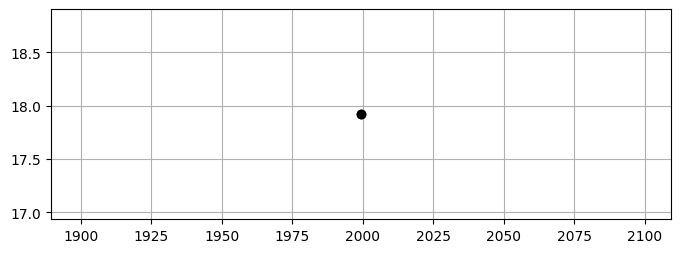

In [26]:
ista = 1850
iloc1 = np.where((typed=='SWL') & (hid==uidNSW[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidNSW[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidNSW[ista]))[0]
#for i in range(len(iloc)):
#    print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

## (3) Northern Territory

In [29]:
fnameNT = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Northern Territory\level_NT.csv'
dataNT = pd.read_csv(fnameNT)
print(dataNT)

          hydroid hydrocode   bore_id data_owner            bore_date  \
0        70012998  RN014099  RN014099     w00067  2022-08-18 00:00:00   
1        70012998  RN014099  RN014099     w00067  2022-08-18 00:00:00   
2        70012998  RN014099  RN014099     w00067  2022-08-18 00:00:00   
3        70012998  RN014099  RN014099     w00067  2019-11-27 00:00:00   
4        70012998  RN014099  RN014099     w00067  2019-11-27 00:00:00   
...           ...       ...       ...        ...                  ...   
2894797  70021748  RN021730  RN021730     w00067  1982-10-07 00:00:00   
2894798  70021748  RN021730  RN021730     w00067  1982-10-07 00:00:00   
2894799  70021748  RN021730  RN021730     w00067  1982-09-18 00:00:00   
2894800  70021748  RN021730  RN021730     w00067  1982-09-18 00:00:00   
2894801  70021748  RN021730  RN021730     w00067  1982-09-18 00:00:00   

        obs_point_datum  result quality_flag  
0                   SWL   25.30    quality-A  
1           RSWL (mAHD)  544.

In [30]:
hid    = dataNT.iloc[:,0].to_numpy()
uidNT    = np.unique(hid)
hcode  = dataNT.iloc[:,1].to_numpy()
bid    = dataNT.iloc[:,2].to_numpy()
down   = dataNT.iloc[:,3].to_numpy()
date   = dataNT.iloc[:,4].to_numpy()
typed  = dataNT.iloc[:,5].to_numpy()
wlevel = dataNT.iloc[:,6].to_numpy()
qual   = dataNT.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidNT))

# de estaciones  2349


### Cantidad de datos por estación

In [31]:
dataNT["bore_date"] = pd.to_datetime(dataNT["bore_date"], errors='coerce')
data = dataNT.dropna(subset=["bore_date"])
dpeNT = dataNT.groupby(["bore_id", dataNT["bore_date"].dt.year]).size()

df_dep = dpeNT.reset_index()
df_dep.columns = ["Estación", "Año", "Candidad de datos"]
df_dep.columns

Index(['Estación', 'Año', 'Candidad de datos'], dtype='object')

### Estación con más datos

In [33]:
max_datos = dpeNT.idxmax()
estacion_max_datos, anio_max_datos = max_datos
print(f"Estación con más datos: {estacion_max_datos}, Año: {anio_max_datos}")

Estación con más datos: RN015576, Año: 2012.0


### Año con más datos

In [34]:
spaNT = dpeNT.groupby(level=1).sum()
amdNT = spaNT.idxmax()
print("El año con la mayor cantidad de datos es", amdNT)

El año con la mayor cantidad de datos es 2012.0


### Estación

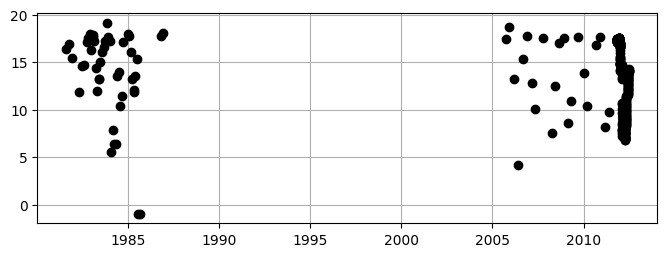

In [35]:
ista = 1820
iloc1 = np.where((typed=='SWL') & (hid==uidNT[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidNT[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidNT[ista]))[0]
#for i in range(len(iloc)):
#    print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
#ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

## (4) Queesland

In [124]:
fnameQLD = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Queesland\level_qld.csv'
dataQLD = pd.read_csv(fnameQLD)
print(dataQLD)

          hydroid  hydrocode    bore_id data_owner   bore_date  \
0        40145411      1016A      1016A     w00066  1950-07-04   
1        40145411      1016A      1016A     w00066  1954-07-02   
2        40145411      1016A      1016A     w00066  1965-07-31   
3        40148262      1021A      1021A     w00066  1909-01-01   
4        40149272      1028A      1028A     w00066  1948-06-30   
...           ...        ...        ...        ...         ...   
9856189  40135465  13600139B  13600139B     w00066  2009-04-03   
9856190  40135465  13600139B  13600139B     w00066  2009-04-03   
9856191  40135465  13600139B  13600139B     w00066  2009-04-03   
9856192  40135465  13600139B  13600139B     w00066  2009-05-12   
9856193  40135465  13600139B  13600139B     w00066  2009-05-12   

        obs_point_datum  result quality_flag  
0                   SWL    0.76    quality-A  
1                   SWL    0.31    quality-A  
2                   SWL    1.22    quality-A  
3                  

In [125]:
hid    = dataQLD.iloc[:,0].to_numpy()
uidQLD    = np.unique(hid)
hcode  = dataQLD.iloc[:,1].to_numpy()
bid    = dataQLD.iloc[:,2].to_numpy()
down   = dataQLD.iloc[:,3].to_numpy()
date   = dataQLD.iloc[:,4].to_numpy()
typed  = dataQLD.iloc[:,5].to_numpy()
wlevel = dataQLD.iloc[:,6].to_numpy()
qual   = dataQLD.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidQLD))

# de estaciones  17895


### Cantidad de datos por estación

In [126]:
dataQLD['bore_date'] = pd.to_datetime(dataQLD['bore_date']) #cambiar formato
data = dataQLD.dropna(subset=['bore_date']) #eliminar espacios vacios
dpeQLD = dataQLD.groupby (["bore_id", dataQLD["bore_date"].dt.year]).size()

df_dep= dpeQLD.reset_index()
df_dep.columns = ["Estación", "Año", "Cantidad de datos"]

### Estación con más datos

In [127]:
try:
    value = dataQLD.loc['RN015576']
except KeyError:
    print("Key 'RN015576' not found in the index.")

Key 'RN015576' not found in the index.


In [128]:
# Check if 'RN015576' exists in the first level of the MultiIndex
if 'RN015576' in dataQLD.index.levels[0]:
    # Access the value using both levels of the MultiIndex
    value = dataQLD.loc[('RN015576', 2012.0)]
else:
    print("Key 'RN015576' not found in the first level of the MultiIndex.")

AttributeError: 'RangeIndex' object has no attribute 'levels'

In [129]:
max_datosQLD = dpeQLD.idxmax()
estacion_max_datos, anio_max_datos = max_datosQLD
print(f"Estación con más datos: {estacion_max_datos}, Año: {anio_max_datos}, Cantidad de datos: {dpeQLD[max_datos]}")

KeyError: ('RN015576', 2012.0)

### Año con más datos

In [131]:
spaQLD = dpeQLD.groupby(level=1).sum()
amdQLD = spaQLD.idxmax()
print("El año con la mayor cantidad de datos es:", amdQLD)

El año con la mayor cantidad de datos es: 2021


In [140]:
data_2021 = data[data['bore_date'].dt.year == 2021]  # Filtrar los datos para el año 2021

In [141]:
niveles_2021 = data_2021['result']

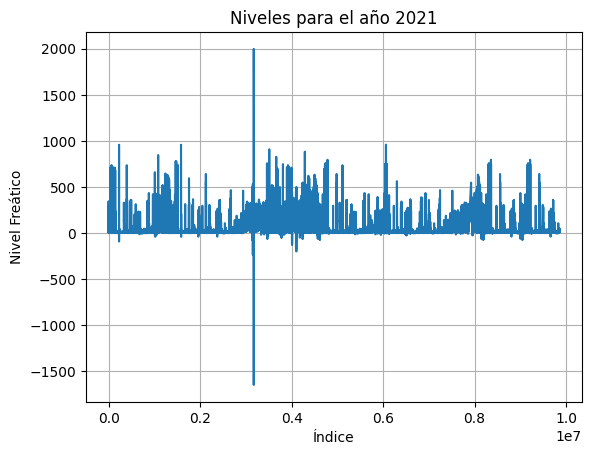

In [142]:
# Graficar los niveles
plt.plot(niveles_2021)
plt.xlabel('Índice')
plt.ylabel('Nivel Freático')
plt.title('Niveles para el año 2021')
plt.grid(True)
plt.show()

In [144]:
data['bore_date'] = pd.to_datetime(data['bore_date'])

# Filtrar los datos para el año 2021
data_2021 = data[data['bore_date'].dt.year == 2021]

# Encontrar las estaciones con datos para el año 2021
estaciones_2021 = data_2021.groupby('bore_id').filter(lambda x: len(x) > 0)['bore_id'].unique()

In [145]:
estaciones_2021

array(['103068A', '103322A', '10510002A', ..., '160694A', '160699A',
       '160704A'], dtype=object)

### Estación

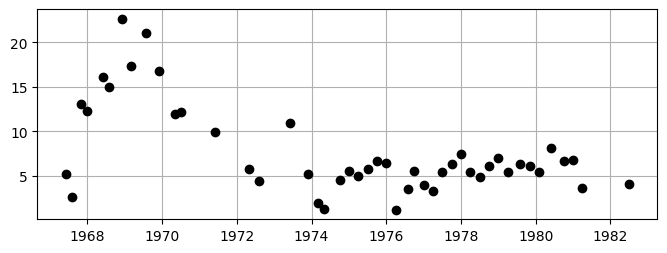

In [143]:
ista = 1258
iloc1 = np.where((typed=='SWL') & (hid==uidQLD[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidQLD[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidQLD[ista]))[0]
#for i in range(len(iloc)):
#    print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

### Porcentajes de aporte de cada estación

In [52]:
total_datosQLD = dpeQLD.sum()
ppeQLD = (dpeQLD / total_datosQLD)*100

print(ppeQLD)

bore_id     bore_date
100110001A  1970         0.00001
            1971         0.00002
            1973         0.00002
            1974         0.00002
            1975         0.00002
                          ...   
99A         1925         0.00003
            1983         0.00003
            1987         0.00003
            2000         0.00003
            2009         0.00003
Length: 245151, dtype: float64


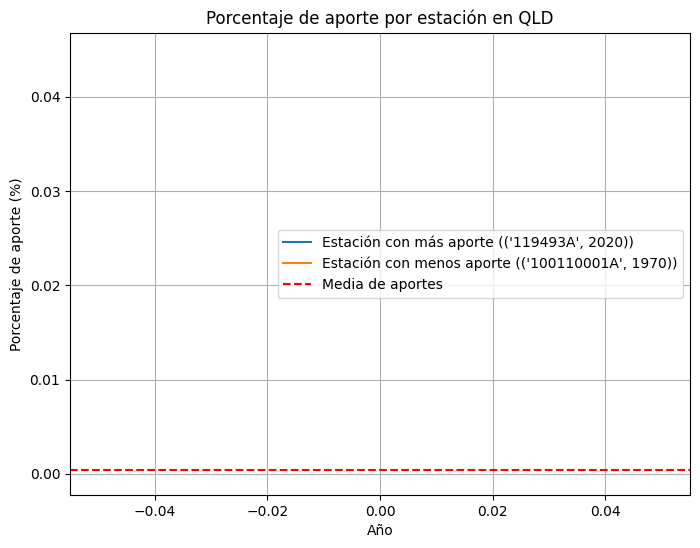

In [55]:
estacion_max_aporte = ppeQLD.idxmax()
estacion_min_aporte = ppeQLD.idxmin()
media_aporte = ppeQLD.mean()

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(ppeQLD.loc[estacion_max_aporte], label=f'Estación con más aporte ({estacion_max_aporte})')
plt.plot(ppeQLD.loc[estacion_min_aporte], label=f'Estación con menos aporte ({estacion_min_aporte})')
plt.axhline(y=media_aporte, color='r', linestyle='--', label='Media de aportes')
plt.title('Porcentaje de aporte por estación en QLD')
plt.xlabel('Año')
plt.ylabel('Porcentaje de aporte (%)')
plt.legend()
plt.grid(True)
plt.show()

### Años de los datos

In [59]:
acdQLD = spa.index
print("Años con datos:", acdQLD)

Años con datos: Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='bore_date')


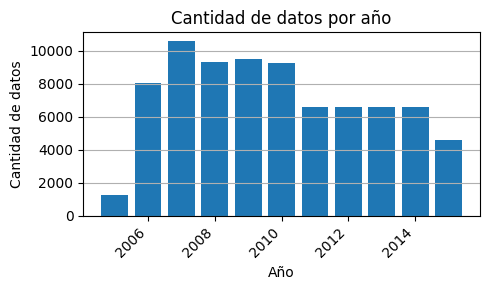

In [57]:
# Graficar el histograma
plt.figure(figsize=(5, 3))
plt.bar(spa.index, spa.values)
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.grid(axis='y')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### (5) South Australian

In [74]:
fnameSA = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\South Australia\level_SA.csv'
dataSA = pd.read_csv(fnameSA)
print(dataSA)

          hydroid  hydrocode  bore_id data_owner   bore_date obs_point_datum  \
0        30187326  593800042    10000     w00078  1978-09-15     RSWL (mAHD)   
1        30187326  593800042    10000     w00078  1927-01-01     RSWL (mAHD)   
2        30187326  593800042    10000     w00078  1927-01-01             SWL   
3        30187326  593800042    10000     w00078  1962-05-08             SWL   
4        30187326  593800042    10000     w00078  1978-09-15             DTW   
...           ...        ...      ...        ...         ...             ...   
6513738  30143732  692501733    99998     w00078  1969-07-07     RSWL (mAHD)   
6513739  30143732  692501733    99998     w00078  1969-07-07             SWL   
6513740  30083891  692501734    99999     w00078  1969-07-08             DTW   
6513741  30083891  692501734    99999     w00078  1969-07-08     RSWL (mAHD)   
6513742  30083891  692501734    99999     w00078  1969-07-08             SWL   

         result quality_flag  
0       

In [76]:
hid    = dataSA.iloc[:,0].to_numpy()
uidSA    = np.unique(hid)
hcode  = dataSA.iloc[:,1].to_numpy()
bid    = dataSA.iloc[:,2].to_numpy()
down   = dataSA.iloc[:,3].to_numpy()
date   = dataSA.iloc[:,4].to_numpy()
typed  = dataSA.iloc[:,5].to_numpy()
wlevel = dataSA.iloc[:,6].to_numpy()
qual   = dataSA.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidSA))

# de estaciones  110032


### Cantidad de datos por estación

In [66]:
dataSA['bore_date'] = pd.to_datetime(dataSA['bore_date'], format='%Y-%m-%d', errors='coerce')
data = dataSA.dropna(subset=['bore_date']) #eliminar espacios vacios
dpeSA = dataSA.groupby (["bore_id", dataSA["bore_date"].dt.year]).size()

df_depSA= dpeSA.reset_index()
df_depSA.columns = ["Estación", "Año", "Cantidad de datos"]

### Estación con más datos

In [69]:
if ('RN015576', 2012.0) in dataSA.index:
    # Accede al valor
    value = dataSA.loc[('RN015576', 2012.0)]
else:
    # Maneja el caso en el que la clave no existe
    print("La clave ('RN015576', 2012.0) no se encuentra en el índice.")

La clave ('RN015576', 2012.0) no se encuentra en el índice.


In [70]:
max_datosSA = dpeSA.idxmax()
estacion_max_datosSA, anio_max_datosSA = max_datosSA
print(f"Estación con más datos: {estacion_max_datosSA}, Año: {anio_max_datosSA}, Cantidad de datos: {dpeSA[max_datos]}")

KeyError: ('RN015576', 2012.0)

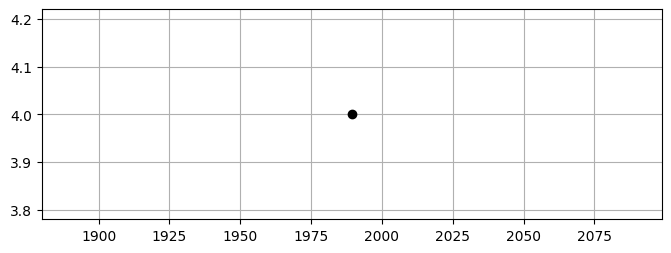

In [80]:
ista = 75000
iloc1 = np.where((typed=='SWL') & (hid==uidSA[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidSA[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidSA[ista]))[0]
#for i in range(len(iloc)):
#print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
#ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

### (6) Tasmania

In [81]:
fnameTAS = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Tasmania\level_TAS.csv'
dataTAS = pd.read_csv(fnameTAS)
print(dataTAS)

          hydroid  hydrocode  bore_id data_owner            bore_date  \
0        60008573      41446    41446     w00072           2011-07-15   
1        60008573      41446    41446     w00072           2011-07-15   
2        60008573      41446    41446     w00072           2011-07-15   
3        60008573      41446    41446     w00072           2013-04-18   
4        60008573      41446    41446     w00072           2013-04-18   
...           ...        ...      ...        ...                  ...   
1109775  60009260      41488    41488     w00072  2006-02-19 11:53:41   
1109776  60009260      41488    41488     w00072  2006-02-20 02:23:41   
1109777  60009260      41488    41488     w00072  2006-02-21 17:38:41   
1109778  60009260      41488    41488     w00072  2006-02-22 03:08:41   
1109779  60009260      41488    41488     w00072  2006-02-23 02:23:41   

        obs_point_datum  result quality_flag  
0                   DTW   10.40    quality-B  
1           RSWL (mAHD)  236.

In [82]:
hid    = dataTAS.iloc[:,0].to_numpy()
uidTAS    = np.unique(hid)
hcode  = dataTAS.iloc[:,1].to_numpy()
bid    = dataTAS.iloc[:,2].to_numpy()
down   = dataTAS.iloc[:,3].to_numpy()
date   = dataTAS.iloc[:,4].to_numpy()
typed  = dataTAS.iloc[:,5].to_numpy()
wlevel = dataTAS.iloc[:,6].to_numpy()
qual   = dataTAS.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidTAS))

# de estaciones  93


### Cantidad de datos por estación

In [86]:
dataTAS['bore_date'] = pd.to_datetime(dataTAS['bore_date'], format='%Y-%m-%d', errors='coerce')
data = dataTAS.dropna(subset=['bore_date']) #eliminar espacios vacios
dpeTAS = dataTAS.groupby (["bore_id", dataTAS["bore_date"].dt.year]).size()

df_dep= dpe.reset_index()
df_dep.columns = ["Estación", "Año", "Cantidad de datos"] + list(df_dep.columns[3:])


In [87]:
plt.figure(figsize=(8, 6))

# Iterar sobre cada estación
for estacion, datos_estacion in df_dep.groupby('Estación'):
    plt.plot(datos_estacion['Año'], datos_estacion['Cantidad de datos'], label=estacion)

# Configuraciones del gráfico
plt.title('Cantidad de datos por año para cada estación ACT')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.legend(title='Estación')
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 728x1103951 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

### Estación con más datos

In [89]:
max_datosTAS = dpeTAS.idxmax()
estacion_max_datosTAS, anio_max_datosTAS = max_datosTAS
print(f'Estación con más datos: {estacion_max_datosTAS}, Año: {anio_max_datosTAS}, Cantidad de datos: {dpeTAS[max_datos]}')

KeyError: ('RN015576', 2012.0)

### Año con más datos

In [90]:
spaTAS = dpeTAS.groupby(level=1).sum()
amdTAS = spaTAS.idxmax()
print("El año con la mayor cantidad de datos es:", amdTAS)

El año con la mayor cantidad de datos es: 2016.0


### Estación

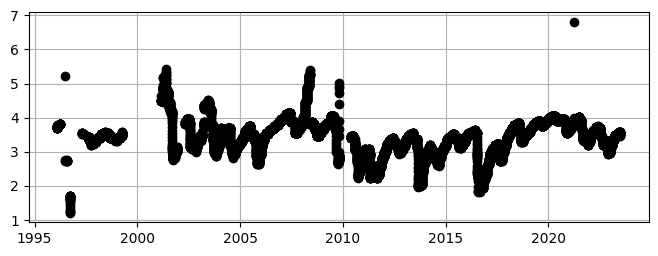

In [91]:
ista = 60
iloc1 = np.where((typed=='SWL') & (hid==uidTAS[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidTAS[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidTAS[ista]))[0]
#for i in range(len(iloc)):
#print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
#ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

### Porcentajes de aporte de cada estación

In [92]:
total_datosTAS = dpeTAS.sum()
ppeTAS = (dpeTAS / total_datosTAS)*100

print(ppeTAS)

bore_id  bore_date
2556     2011.0       0.000276
         2015.0       0.006069
         2016.0       0.052966
         2017.0       0.062897
         2018.0       0.100690
                        ...   
42407    2022.0       0.031816
         2023.0       0.013517
42408    2021.0       0.004782
         2022.0       0.031540
         2023.0       0.013517
Length: 1262, dtype: float64


In [100]:
acdTAS = spa.index
print("Años con datos:", acdTAS)

Años con datos: Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='bore_date')


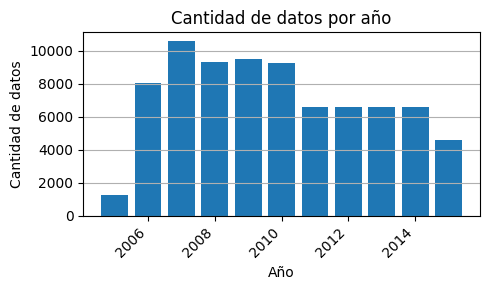

In [101]:
# Graficar el histograma
plt.figure(figsize=(5, 3))
plt.bar(spa.index, spa.values)
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.grid(axis='y')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## (7) Victoria

In [118]:
fnameVIC = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Victoria\level_vic.csv'
dataVIC = pd.read_csv(fnameVIC)
print(dataVIC)

C:\Users\Andrea Fandiño P\AppData\Local\Temp\ipykernel_10128\1041687761.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataVIC = pd.read_csv(fnameVIC)


           hydroid hydrocode bore_id data_owner   bore_date obs_point_datum  \
0         20198966    REM013  REM013     w00074  2010-06-21             DTW   
1         20198966    REM013  REM013     w00074  2010-06-21     RSWL (mAHD)   
2         20198966    REM013  REM013     w00074  2010-06-21             SWL   
3         20198966    REM013  REM013     w00074  2011-05-02             DTW   
4         20198966    REM013  REM013     w00074  2011-05-02     RSWL (mAHD)   
...            ...       ...     ...        ...         ...             ...   
10640834  20180564      2191    2191     w00074  1982-12-14     RSWL (mAHD)   
10640835  20180564      2191    2191     w00074  1982-12-14             SWL   
10640836  20180564      2191    2191     w00074  1983-01-17             DTW   
10640837  20180564      2191    2191     w00074  1983-01-17     RSWL (mAHD)   
10640838  20180564      2191    2191     w00074  1983-01-17             SWL   

          result quality_flag  
0           4.97   

In [119]:
hid    = dataVIC.iloc[:,0].to_numpy()
uidVIC    = np.unique(hid)
hcode  = dataVIC.iloc[:,1].to_numpy()
bid    = dataVIC.iloc[:,2].to_numpy()
down   = dataVIC.iloc[:,3].to_numpy()
date   = dataVIC.iloc[:,4].to_numpy()
typed  = dataVIC.iloc[:,5].to_numpy()
wlevel = dataVIC.iloc[:,6].to_numpy()
qual   = dataVIC.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidVIC))

# de estaciones  20554


### Cantidad de datos por estación

In [120]:
dataVIC['bore_date'] = pd.to_datetime(dataVIC['bore_date'], format='%Y-%m-%d')
data = dataVIC.dropna(subset=['bore_date']) #eliminar espacios vacios
dpeVIC = dataVIC.groupby (["bore_id", dataVIC["bore_date"].dt.year]).size()

df_depVIC= dpeVIC.reset_index()
df_depVIC.columns = ["Estación", "Año", "Cantidad de datos"]

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:00", at position 5441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### Estación

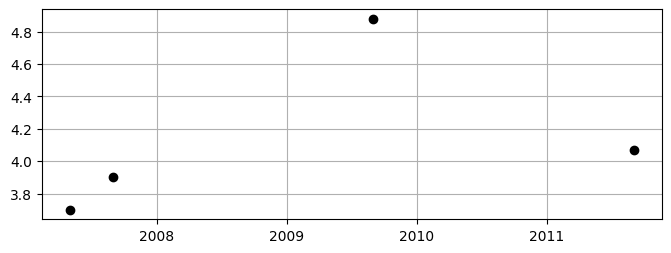

In [121]:
ista = 5458
iloc1 = np.where((typed=='SWL') & (hid==uidVIC[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidVIC[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidVIC[ista]))[0]
#for i in range(len(iloc)):
#print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
#ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
#ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
#ax2.grid()

### Tendencia del  nivel "Result"

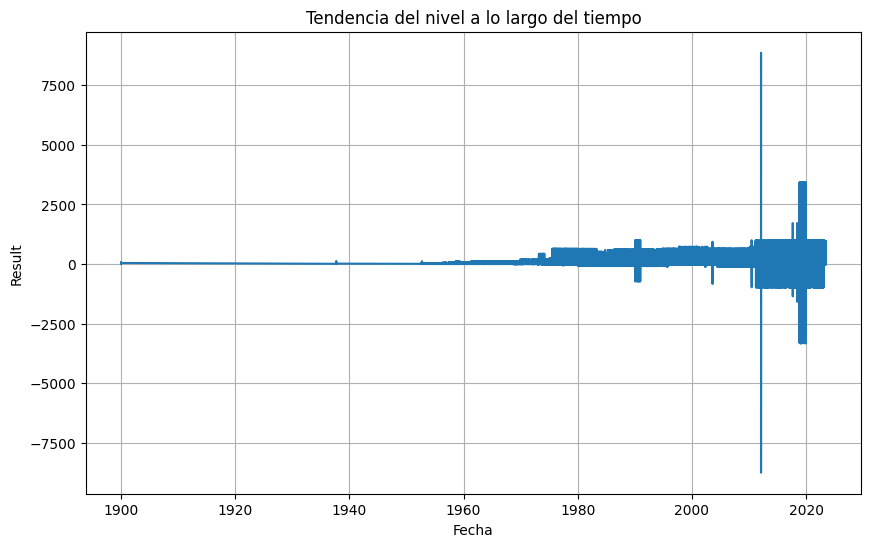

In [122]:
# Convertir la columna 'bore_date' a tipo datetime
dataVIC['bore_date'] = pd.to_datetime(dataVIC['bore_date'].str.split(' ').str[0], format="%Y-%m-%d")



# Ordenar los datos por fecha
datos = dataVIC.sort_values(by='bore_date')

# Graficar la tendencia de 'result' a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(datos['bore_date'], datos['result'])
plt.title('Tendencia del nivel a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Result')
plt.grid(True)
plt.show()

## (8) Western Australia

In [ ]:
fnameWA = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\Western Australia\level_WA.csv'
data = pd.read_csv(fnameWA)
print(data)

          hydroid  hydrocode    bore_id data_owner   bore_date  \
0        50119779  120210001  120210001     w00076  1962-11-15   
1        50119779  120210001  120210001     w00076  1962-11-15   
2        50119779  120210001  120210001     w00076  1962-11-15   
3        50119785  120210007  120210007     w00076  1964-06-30   
4        50119785  120210007  120210007     w00076  1964-06-30   
...           ...        ...        ...        ...         ...   
2303546  50119738   81019020   81019020     w00076  1993-11-15   
2303547  50119738   81019020   81019020     w00076  1993-11-16   
2303548  50119739   81019021   81019021     w00076  1993-11-18   
2303549  50119740   81019022   81019022     w00076  1993-11-20   
2303550  50119740   81019022   81019022     w00076  1993-11-21   

        obs_point_datum  result quality_flag  
0                   DTW   38.10    quality-A  
1           RSWL (mAHD)  153.92    quality-A  
2                   SWL   38.10    quality-A  
3                  

In [ ]:
hid    = data.iloc[:,0].to_numpy()
uidWA    = np.unique(hid)
hcode  = data.iloc[:,1].to_numpy()
bid    = data.iloc[:,2].to_numpy()
down   = data.iloc[:,3].to_numpy()
date   = data.iloc[:,4].to_numpy()
typed  = data.iloc[:,5].to_numpy()
wlevel = data.iloc[:,6].to_numpy()
qual   = data.iloc[:,7].to_numpy()
ndat   = len(date)
yr     = np.zeros(ndat,dtype=int)
mo     = np.zeros(ndat,dtype=int)
for i in range(ndat):
    txt   = date[i]
    yr[i] = int(txt[0:4])
    mo[i] = int(txt[5:7])
        
print('# de estaciones ', len(uidWA))

# de estaciones  64859


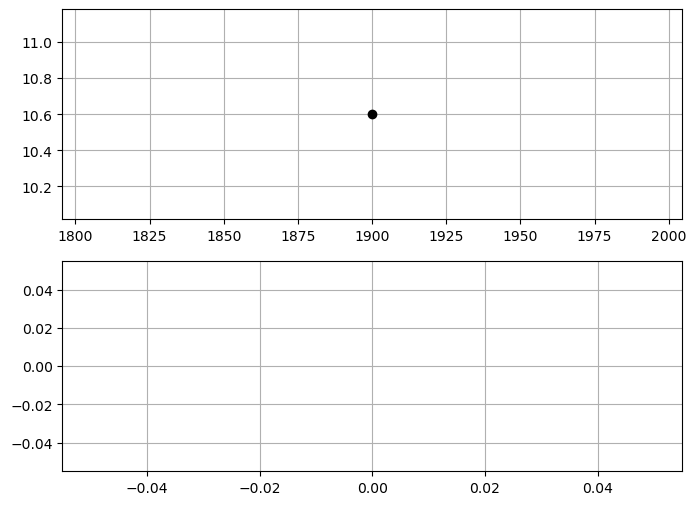

In [ ]:
ista = 50000
iloc1 = np.where((typed=='SWL') & (hid==uidWA[ista]))[0]
iloc2 = np.where((typed=='DTW') & (hid==uidWA[ista]))[0]
iloc3 = np.where((typed=='RSWL (mAHD)') & (hid==uidWA[ista]))[0]
#for i in range(len(iloc)):
#print(hid[iloc[i]],wlevel[iloc[i]],yr[iloc[i]],mo[iloc[i]])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(yr[iloc1]+mo[iloc1]/12,wlevel[iloc1],'ko')
ax1.plot(yr[iloc2]+mo[iloc2]/12,wlevel[iloc2],'r.')
ax2.plot(yr[iloc3]+mo[iloc3]/12,wlevel[iloc3],'ko')
ax1.grid()
ax2.grid()

## Cantidad de Estaciones por Región

In [ ]:
valores = [15, 5722, 2349, 17895, 110032, 93, 20554, 64859]
estaciones = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC','WA']
regiones = ['Australia Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia', ]


In [ ]:
valores_ordenados, estaciones_ordenadas, regiones_ordenadas = zip(*sorted(zip(valores, estaciones, regiones), reverse=True))

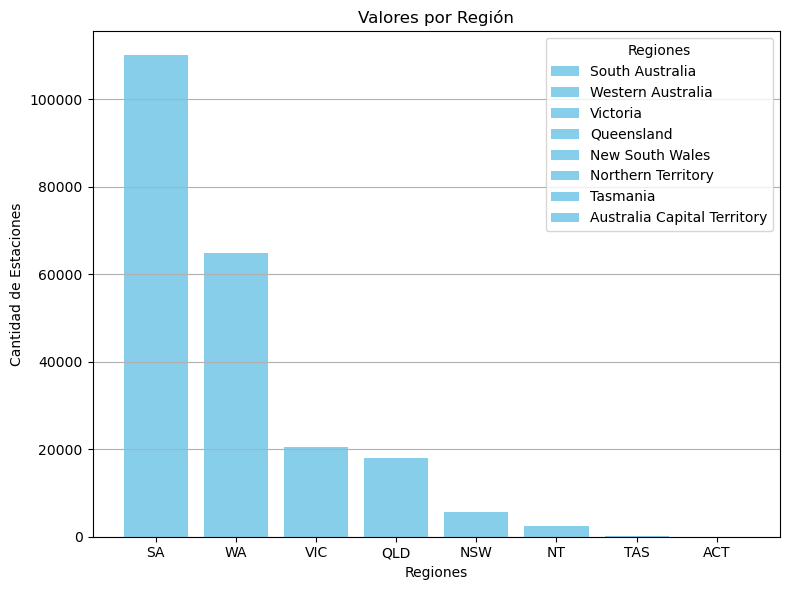

In [ ]:
# Crea el histograma
plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(estaciones_ordenadas)), valores_ordenados, color='skyblue')

# Establece las etiquetas del eje x como abreviaciones de estaciones
plt.xticks(range(len(estaciones_ordenadas)), estaciones_ordenadas)

plt.xlabel('Regiones')
plt.ylabel('Cantidad de Estaciones')
plt.title('Valores por Región')

# Crea una leyenda para mostrar el nombre completo de la estación
legend_labels = {estacion: region for estacion, region in zip(estaciones_ordenadas, regiones_ordenadas)}
plt.legend(handles=bars, labels=legend_labels.values(), title='Regiones', loc='upper right')

plt.grid(axis='y')  # Agrega una cuadrícula en el eje y
plt.tight_layout()  # Ajusta automáticamente la disposición para evitar superposiciones
plt.show()

### Regiones

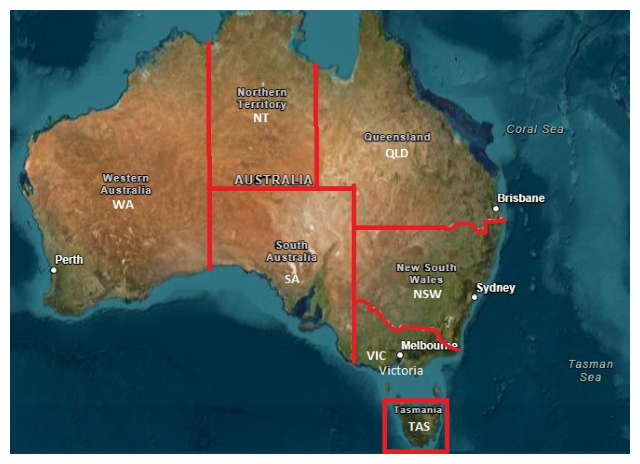

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
ruta = "G:/Mi unidad/Maestria/Proyecto de Grado/analisis_nf/datos/australia/regiones.JPG"
imagen = mpimg.imread(ruta)
plt.figure(figsize=(8, 6)) 

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')
plt.show()